In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [3]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### normalize=True라는 옵션을 통해 비율로 표시가 됨

In [4]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### survived의 pclass를 기준으로 그룹화, 아마 3개의 그룹이 출력됨

In [5]:
train['Survived'].groupby(train["Pclass"]).groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

### 생존율이 나옴 : pclass를 그룹화해서 생존율이 나옴
- 선실등급에 따른 생존률

In [6]:
train['Survived'].groupby(train["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

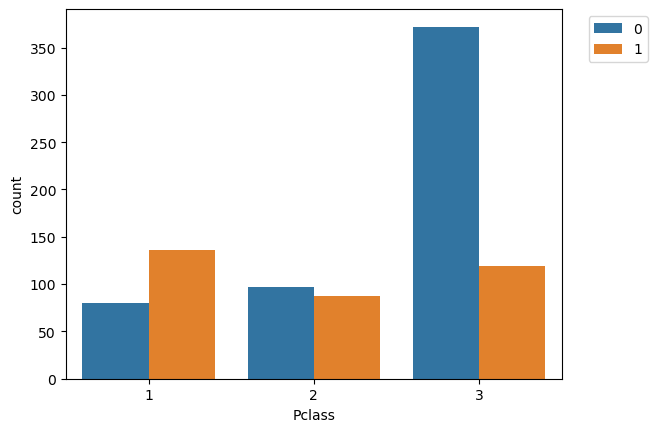

In [7]:
sns.countplot(x=train['Pclass'], hue=train['Survived'])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

### 종류별 데이터의 건수 람다함수를 이용했음

In [8]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Title, dtype: int64

In [9]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24


### 5개의 구간으로 나누고 구간에 따른 생존률이 표시

In [11]:
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

### 만약 가족들이 train과 test에 나누어진 경우
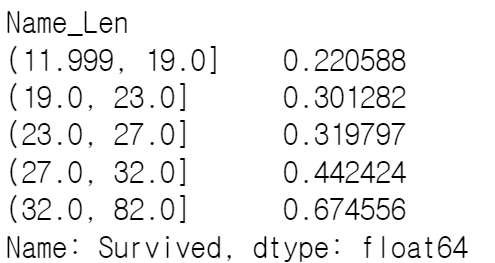
이 값을 통해 이름이 길이가 생존율에 영향을 미침을 예측할 수 있다

### 5개의 구간으로 나누고 value_counts() 적용


In [12]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

### 성비를 확인하는것

In [13]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

### 성별에 따른 각각 그룹별 생존률

In [14]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [15]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

### 나이를 5개의 구간으로 나누어서 각 구간에 대한 생존 평균

In [16]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [17]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [18]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [19]:
train['Ticket_Len']

0       9
1       8
2      16
3       6
4       6
       ..
886     6
887     6
888    10
889     6
890     6
Name: Ticket_Len, Length: 891, dtype: int64

In [20]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [21]:
train["Ticket"].str[0]

0      A
1      P
2      S
3      1
4      3
      ..
886    2
887    1
888    W
889    1
890    3
Name: Ticket, Length: 891, dtype: object

In [22]:
train['Ticket'].apply(lambda x: x[0])

0      A
1      P
2      S
3      1
4      3
      ..
886    2
887    1
888    W
889    1
890    3
Name: Ticket, Length: 891, dtype: object

In [23]:
train["Ticket_Lett"]=train['Ticket'].apply(lambda x: x[0])

In [24]:
train["Ticket_Lett"].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

### 위의 코드에 대해 각 그룹에 대한 생존율
여기서 생존율이 높은 티켓에 몇번째로 시작하는지 알 수 있다

In [25]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

### train 데이터를  fare를 기준으로 그룹화

In [26]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [27]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

### 빈도수를 나타내는 테이블, 한눈에 데이터를 볼 수 있다는 장점이 있다

In [28]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


### 객실

In [29]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [30]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [31]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

### cabin에 결측값으로 인해서 모델링이 부담스러울수있다
### 그래서 전처리가 필요

In [32]:
train['Cabin'].isnull().sum()

687

In [33]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [34]:
train['Cabin'].apply(lambda x: str(x).split(' ')[-1])

0       nan
1       C85
2       nan
3      C123
4       nan
       ... 
886     nan
887     B42
888     nan
889    C148
890     nan
Name: Cabin, Length: 891, dtype: object

In [35]:
train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
# ab cde -> de

0       an
1       85
2       an
3      123
4       an
      ... 
886     an
887     42
888     an
889    148
890     an
Name: Cabin, Length: 891, dtype: object

In [36]:
train['Cabin_num'] =train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])

In [37]:
train['Cabin_num'] 

0       an
1       85
2       an
3      123
4       an
      ... 
886     an
887     42
888     an
889    148
890     an
Name: Cabin_num, Length: 891, dtype: object

In [38]:
train['Cabin_num'].replace('an', np.NaN, inplace = True)

In [39]:
train['Cabin_num'] 

0      NaN
1       85
2      NaN
3      123
4      NaN
      ... 
886    NaN
887     42
888    NaN
889    148
890    NaN
Name: Cabin_num, Length: 891, dtype: object

In [40]:
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

해석 : cabin_num를 전체 x로 받고 결측값이 아니면서 빈 문자가 아니라면 x를 int로 취하고 아니면 np.NaN를 넣어라

In [41]:
train['Cabin_num'] 

0        NaN
1       85.0
2        NaN
3      123.0
4        NaN
       ...  
886      NaN
887     42.0
888      NaN
889    148.0
890      NaN
Name: Cabin_num, Length: 891, dtype: float64

### qcut를 통해 균등하게 나옴

In [42]:
pd.qcut(train['Cabin_num'],3).value_counts()

(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [43]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [44]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789357

### 정착지

In [45]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [47]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

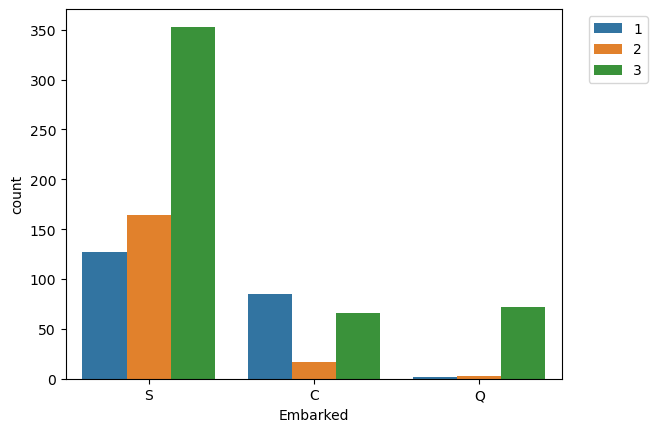

In [48]:
sns.countplot(x=train['Embarked'], hue=train['Pclass'])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# 피쳐엔지니어링

In [49]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

해석 : names에 train, test가 전달, 이 두개의 데이터프레임이 리스트로 넘어가고
     i에 저장된 트레인 데이터의 이름의 길이를 추출해서 저장하고
        타이틀도 추출해서 집어넣고 그 이름을 제거함

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0


In [51]:
train,test=names(train,test)

In [52]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_Title', 'Name_Len',
       'Ticket_Len', 'Ticket_Lett', 'Cabin_Letter', 'Cabin_num'],
      dtype='object')

In [53]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0


In [54]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [55]:
train, test = age_impute(train, test)

In [56]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num,Age_Null_Flag
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN,0
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0,0
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN,0
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0,0
4,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN,0
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0,0
888,889,0,3,female,16.123188,1,2,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN,1
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0,0


In [57]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [58]:
train, test = fam_size(train, test)

In [59]:
train

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num,Age_Null_Flag,Fam_Size
0,1,0,3,male,22.000000,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN,0,Nuclear
1,2,1,1,female,38.000000,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0,0,Nuclear
2,3,1,3,female,26.000000,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN,0,Solo
3,4,1,1,female,35.000000,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0,0,Nuclear
4,5,0,3,male,35.000000,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN,0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN,0,Solo
887,888,1,1,female,19.000000,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0,0,Solo
888,889,0,3,female,16.123188,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN,1,Nuclear
889,890,1,1,male,26.000000,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0,0,Solo


In [60]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [61]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [62]:
train, test = ticket_grouped(train, test)

# get_dummies

In [63]:
df=pd.DataFrame({"bt":["A","B","O","AB"]})
df

,bt
0,A
1,B
2,O
3,AB


In [64]:
pd.get_dummies(df["bt"])

,A,AB,B,O
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


### 결측값이 있는 경우

In [65]:
df=pd.DataFrame({"bt":["A","B",np.nan,"O","AB"]})
df

,bt
0,A
1,B
2,NaN
3,O
4,AB


In [66]:
pd.get_dummies(df["bt"])

,A,AB,B,O
0,1,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


# 전처리

In [67]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [68]:
train, test = cabin_num(train, test)

In [69]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Age_Null_Flag,Fam_Size,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]"
0,1,0,3,male,22.000000,7.2500,NaN,S,Mr.,23,9,A,n,0,Nuclear,0,0,0
1,2,1,1,female,38.000000,71.2833,C85,C,Mrs.,51,8,P,C,0,Nuclear,0,0,1
2,3,1,3,female,26.000000,7.9250,NaN,S,Miss.,22,16,S,n,0,Solo,0,0,0
3,4,1,1,female,35.000000,53.1000,C123,S,Mrs.,44,6,1,C,0,Nuclear,0,0,1
4,5,0,3,male,35.000000,8.0500,NaN,S,Mr.,24,6,3,n,0,Solo,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,NaN,S,Rev.,21,6,2,n,0,Solo,0,0,0
887,888,1,1,female,19.000000,30.0000,B42,S,Miss.,28,6,1,B,0,Solo,0,1,0
888,889,0,3,female,16.123188,23.4500,NaN,S,Miss.,40,10,Low_ticket,n,1,Nuclear,0,0,0
889,890,1,1,male,26.000000,30.0000,C148,C,Mr.,21,6,1,C,0,Solo,0,0,1


In [70]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [71]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [72]:
train, test = cabin(train, test)

In [73]:
train, test = embarked_impute(train, test)

In [74]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [75]:
train, test = drop(train, test)

In [76]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Age_Null_Flag,Fam_Size,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]"
0,0,3,male,22.000000,7.2500,S,Mr.,23,9,A,n,0,Nuclear,0,0,0
1,1,1,female,38.000000,71.2833,C,Mrs.,51,8,P,C,0,Nuclear,0,0,1
2,1,3,female,26.000000,7.9250,S,Miss.,22,16,S,n,0,Solo,0,0,0
3,1,1,female,35.000000,53.1000,S,Mrs.,44,6,1,C,0,Nuclear,0,0,1
4,0,3,male,35.000000,8.0500,S,Mr.,24,6,3,n,0,Solo,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Rev.,21,6,2,n,0,Solo,0,0,0
887,1,1,female,19.000000,30.0000,S,Miss.,28,6,1,B,0,Solo,0,1,0
888,0,3,female,16.123188,23.4500,S,Miss.,40,10,Low_ticket,n,1,Nuclear,0,0,0
889,1,1,male,26.000000,30.0000,C,Mr.,21,6,1,C,0,Solo,0,0,1


In [77]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [78]:
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])

In [79]:
train

,Survived,Age,Fare,Name_Len,Ticket_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.000000,7.2500,23,9,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.000000,71.2833,51,8,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,22,16,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.000000,53.1000,44,6,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.000000,8.0500,24,6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,21,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
887,1,19.000000,30.0000,28,6,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
888,0,16.123188,23.4500,40,10,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
889,1,26.000000,30.0000,21,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 원-핫 인코딩이 되었음을 train.columns 통해 알 수 있다

In [80]:
train.columns

Index(['Survived', 'Age', 'Fare', 'Name_Len', 'Ticket_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Pclass_3', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
       'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S', 'Ticket_Lett_1',
       'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

# 랜덤포레스트

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf=1, 
                      random_state=42)
rf

RandomForestClassifier(min_samples_split=10, n_estimators=1000, random_state=42)

In [83]:
rf.fit(train.iloc[:,1:] ,train.iloc[:,0] )

RandomForestClassifier(min_samples_split=10, n_estimators=1000, random_state=42)

rf.predict(test)는 열 이름의 순서가 틀려서 에러가 나오므로 정렬을 통해서 다시 바꿔줘야한다

In [84]:
train.iloc[:,1:].columns

Index(['Age', 'Fare', 'Name_Len', 'Ticket_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Pclass_3', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
       'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S', 'Ticket_Lett_1',
       'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [85]:
pd.DataFrame(train.iloc[:,1:].columns, columns=['var'])

,var
0,Age
1,Fare
2,Name_Len
3,Ticket_Len
4,Age_Null_Flag
5,"Cabin_num_(1.999, 28.667]"
6,"Cabin_num_(28.667, 65.667]"
7,"Cabin_num_(65.667, 148.0]"
8,Pclass_3
9,Pclass_1


# rf.feature_importances_ : 중요도를 확인할 수 있는 옵션

In [86]:
rf.feature_importances_

array([0.07885406, 0.08980433, 0.08667422, 0.0322711 , 0.00858648,
       0.00944051, 0.0051996 , 0.00355329, 0.0442221 , 0.01884332,
       0.0126309 , 0.11581731, 0.09754623, 0.01180482, 0.00864114,
       0.0057151 , 0.0031643 , 0.0035927 , 0.00488492, 0.01798883,
       0.0129461 , 0.00685238, 0.00328937, 0.01208418, 0.0005459 ,
       0.02586775, 0.00366314, 0.00773812, 0.00130105, 0.00484195,
       0.00153316, 0.00361346, 0.00096492, 0.11818493, 0.02748418,
       0.03197759, 0.01266501, 0.0020361 , 0.00159082, 0.000186  ,
       0.00037343, 0.02286492, 0.011375  , 0.02678531])

In [87]:
pd.DataFrame(rf.feature_importances_, columns=['importance'])

,importance
0,0.078854
1,0.089804
2,0.086674
3,0.032271
4,0.008586
5,0.009441
6,0.005200
7,0.003553
8,0.044222
9,0.018843


In [88]:
pd.concat( (pd.DataFrame(train.iloc[:,1:].columns, columns=['var']),
pd.DataFrame(rf.feature_importances_, columns=['importance'])),axis=1)

,var,importance
0,Age,0.078854
1,Fare,0.089804
2,Name_Len,0.086674
3,Ticket_Len,0.032271
4,Age_Null_Flag,0.008586
5,"Cabin_num_(1.999, 28.667]",0.009441
6,"Cabin_num_(28.667, 65.667]",0.005200
7,"Cabin_num_(65.667, 148.0]",0.003553
8,Pclass_3,0.044222
9,Pclass_1,0.018843


In [89]:
pd.concat( (pd.DataFrame(train.iloc[:,1:].columns, columns=['var']),
pd.DataFrame(rf.feature_importances_, columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)[:20]

,var,importance
33,Name_Title_Mr.,0.118185
11,Sex_male,0.115817
12,Sex_female,0.097546
1,Fare,0.089804
2,Name_Len,0.086674
0,Age,0.078854
8,Pclass_3,0.044222
3,Ticket_Len,0.032271
35,Name_Title_Miss.,0.031978
34,Name_Title_Mrs.,0.027484


In [90]:
train.columns

Index(['Survived', 'Age', 'Fare', 'Name_Len', 'Ticket_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Pclass_3', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
       'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S', 'Ticket_Lett_1',
       'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [91]:
test_df=list(test.columns)
test_df

['Age',
 'Fare',
 'Name_Len',
 'Age_Null_Flag',
 'Ticket_Len',
 'Cabin_num_(1.999, 28.667]',
 'Cabin_num_(28.667, 65.667]',
 'Cabin_num_(65.667, 148.0]',
 'Pclass_3',
 'Pclass_1',
 'Pclass_2',
 'Sex_male',
 'Sex_female',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'Ticket_Lett_A',
 'Ticket_Lett_P',
 'Ticket_Lett_S',
 'Ticket_Lett_1',
 'Ticket_Lett_3',
 'Ticket_Lett_2',
 'Ticket_Lett_C',
 'Ticket_Lett_Low_ticket',
 'Ticket_Lett_Other_ticket',
 'Cabin_Letter_n',
 'Cabin_Letter_C',
 'Cabin_Letter_E',
 'Cabin_Letter_G',
 'Cabin_Letter_D',
 'Cabin_Letter_A',
 'Cabin_Letter_B',
 'Cabin_Letter_F',
 'Name_Title_Mr.',
 'Name_Title_Mrs.',
 'Name_Title_Miss.',
 'Name_Title_Master.',
 'Name_Title_Rev.',
 'Name_Title_Dr.',
 'Name_Title_Ms.',
 'Name_Title_Col.',
 'Fam_Size_Nuclear',
 'Fam_Size_Solo',
 'Fam_Size_Big']

In [92]:
train_df=list(train.columns)[1:]
train_df

['Age',
 'Fare',
 'Name_Len',
 'Ticket_Len',
 'Age_Null_Flag',
 'Cabin_num_(1.999, 28.667]',
 'Cabin_num_(28.667, 65.667]',
 'Cabin_num_(65.667, 148.0]',
 'Pclass_3',
 'Pclass_1',
 'Pclass_2',
 'Sex_male',
 'Sex_female',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'Ticket_Lett_A',
 'Ticket_Lett_P',
 'Ticket_Lett_S',
 'Ticket_Lett_1',
 'Ticket_Lett_3',
 'Ticket_Lett_2',
 'Ticket_Lett_C',
 'Ticket_Lett_Low_ticket',
 'Ticket_Lett_Other_ticket',
 'Cabin_Letter_n',
 'Cabin_Letter_C',
 'Cabin_Letter_E',
 'Cabin_Letter_G',
 'Cabin_Letter_D',
 'Cabin_Letter_A',
 'Cabin_Letter_B',
 'Cabin_Letter_F',
 'Name_Title_Mr.',
 'Name_Title_Mrs.',
 'Name_Title_Miss.',
 'Name_Title_Master.',
 'Name_Title_Rev.',
 'Name_Title_Dr.',
 'Name_Title_Ms.',
 'Name_Title_Col.',
 'Fam_Size_Nuclear',
 'Fam_Size_Solo',
 'Fam_Size_Big']

# train_df의 순서대로 나열이 됨

In [93]:
test[train_df]

,Age,Fare,Name_Len,Ticket_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,Pclass_1,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,22.000000,7.8292,16,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38.000000,7.0000,32,6,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,9.6875,25,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35.000000,8.6625,16,6,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,35.000000,12.2875,44,7,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,32.768293,8.0500,18,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
414,44.000000,108.9000,28,8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
415,33.515152,7.2500,28,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
416,34.000000,8.0500,19,6,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 코드 재작성

In [94]:
test_df=list(test.columns)
train_df=list(train.columns)[1:]
test=test[train_df]
pred1=rf.predict(test)
pred1
pred=pd.DataFrame(pred1,columns=["Survived"])

In [95]:
pred1

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [96]:
pred

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [97]:
test1 = pd.read_csv("titanic/test.csv")

In [98]:
test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [99]:
submission=pd.concat((test1.iloc[:,0],pred),axis=1)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
submission
submission.to_csv("submission.csv", index=False)